<a href="https://colab.research.google.com/github/mpnabil95/Data_Analyst_Project-_E-Commerce_Public_Dataset/blob/main/Data_Analyst_Project_E_Commerce_Public_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Pangeran Nabil
- **Email:** mpnabil95@gmail.com
- **ID Dicoding:** pangeran_nabil

## Menentukan Pertanyaan Bisnis

1. Produk apa yang paling laris dan paling sedikit terjual?
2. Bagaimana performa penjualan platform E-Commerce seiring berjalannya waktu?
3. Bagaimana tingkat kepuasan pelanggan terhadap layanan yang diberikan?
4. Di wilayah mana saja persebaran pelanggan kita yang paling banyak?
5. Kapan terakhir kali pelanggan bertransaksi, seberapa sering mereka bertransaksi, dan berapa banyak uang yang mereka habiskan?





## Import Semua Packages/Library yang Digunakan

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [89]:
# Base URL dari raw repository GitHub
base_url = "https://raw.githubusercontent.com/mpnabil95/Data_Analyst_Project-_E-Commerce_Public_Dataset/main/E-Commerce%20Public%20Dataset/"

In [90]:
# 1. Memuat tabel customers
customers_df = pd.read_csv(base_url + "customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [91]:
# 2. Memuat tabel orders
orders_df = pd.read_csv(base_url + "orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [92]:
# 3. Memuat tabel order items
order_items_df = pd.read_csv(base_url + "order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [93]:
# 4. Memuat tabel products
products_df = pd.read_csv(base_url + "products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [94]:
# 5. Memuat tabel order payments
order_payments_df = pd.read_csv(base_url + "order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [95]:
# 6. Memuat tabel order reviews
order_reviews_df = pd.read_csv(base_url + "order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [96]:
# 7. Memuat tabel sellers
sellers_df = pd.read_csv(base_url + "sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [97]:
# 8. Memuat tabel category translation
category_translation_df = pd.read_csv(base_url + "product_category_name_translation.csv")
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [98]:
# 9. Memuat tabel geolocation
geolocation_df = pd.read_csv(base_url + "geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

#### Menilai tabel `customers_df`

In [99]:
print("\n===> 1. Info customers_df:")
customers_df.info()

print("\n===> 2. Missing Values customers_df:")
print(customers_df.isna().sum())

print("\n===> 3. Duplikasi customers_df:", customers_df.duplicated().sum())


===> 1. Info customers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

===> 2. Missing Values customers_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

===> 3. Duplikasi customers_df: 0


**Insight:**
* Tipe data sudah sesuai.
* Tidak ada missing value.
* Tidak ada data duplikat.




#### Menilai tabel `orders_df`

In [100]:
print("\n===> 1. Info orders_df:")
orders_df.info()

print("\n===> 2. Missing Values orders_df:")
print(orders_df.isna().sum())

print("\n===> 3. Duplikasi orders_df:", orders_df.duplicated().sum())


===> 1. Info orders_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

===> 2. Missing Values orders_df:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delive

**Insight:**
* Kolom tanggal masih berupa object (string), harus dikonversi menjadi datetime.
* Terdapat missing value pada kolom:
  * `order_approved_at` (160)
  * `order_delivered_carrier_date` (1783)
  * `order_delivered_customer_date` (2965)
* Tidak ada data duplikat.


#### Menilai tabel `order_items_df`

In [101]:
print("\n===> 1. Info order_items_df:")
order_items_df.info()

print("\n===> 2. Missing Values order_items_df:")
print(order_items_df.isna().sum())

print("\n===> 3. Duplikasi order_items_df:", order_items_df.duplicated().sum())

print("\n===> 4. Ringkasan Statistik Deskriptif order_items_df:")
display(order_items_df.describe())


===> 1. Info order_items_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

===> 2. Missing Values order_items_df:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

===> 3. Duplikasi order_items_df: 0

===> 4. Ringkasan Statistik Deskriptif order_items_df:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
* Kolom `shipping_limit_date` perlu dikonversi menjadi tipe data datetime.
* Tidak ada missing value.
* Tidak ada data duplikat.


**Ringkasan statistik deskriptif:**
- `price` dan `freight_value` menunjukkan rentang yang lebar, dengan nilai maksimum yang signifikan lebih tinggi dari rata-rata, mengindikasikan adanya beberapa produk/pengiriman dengan harga atau biaya yang tinggi.
* Nilai minimal `price` mendekati nol, menunjukkan ada produk yang sangat murah. Rata-rata `order_item_id` mendekati 1, menunjukkan sebagian besar pesanan hanya memiliki satu jenis barang.

#### Menilai tabel `products_df`

In [102]:
print("\n===> 1. Info products_df:")
products_df.info()

print("\n===> 2. Missing Values products_df:")
print(products_df.isna().sum())

print("\n===> 3. Duplikasi products_df:", products_df.duplicated().sum())

print("\n===> 4. Ringkasan Statistik Deskriptif products_df:")
display(products_df.describe())


===> 1. Info products_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

===> 2. Missing Values products_df:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photo

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
* Tipe data sudah sesuai
* Terdapat missing value pada beberapa kolom:
  * `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty` (masing-masing 610 missing value)
  * `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm` (masing-masing 2 missing value).
* Tidak ada data duplikat


**Ringkasan statistik deskriptif:**
* Jumlah non-null pada kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, serta dimensi produk (`product_weight_g`, dll.) lebih rendah dari total entri, yang mengkonfirmasi adanya missing value yang perlu ditangani.
- Rentang nilai untuk dimensi dan berat produk cukup bervariasi, menunjukkan keragaman produk yang dijual.
* `product_photos_qty` memiliki rata-rata sekitar 2, mengindikasikan kebanyakan produk memiliki beberapa foto.


#### Menilai tabel `order_payments_df`

In [103]:
print("\n===> 1. Info order_payments_df:")
order_payments_df.info()

print("\n===> 2. Missing Values order_payments_df:")
print(order_payments_df.isna().sum())

print("\n===> 3. Duplikasi order_payments_df:", order_payments_df.duplicated().sum())

print("\n===> 4. Ringkasan Statistik Deskriptif order_payments_df:")
display(order_payments_df.describe())


===> 1. Info order_payments_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

===> 2. Missing Values order_payments_df:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

===> 3. Duplikasi order_payments_df: 0

===> 4. Ringkasan Statistik Deskriptif order_payments_df:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
* Tipe data sudah sesuai.
* Tidak ada missing value.
* Tidak data duplikat.

**Ringkasan statistik deskriptif:**
* `payment_sequential` memiliki rata-rata dan min mendekati 1, menunjukkan sebagian besar transaksi pembayaran dilakukan dalam satu urutan.
- `payment_installments` menunjukkan bahwa rata-rata cicilan adalah sekitar 3, dengan maksimum hingga 24 kali, menandakan adanya opsi pembayaran cicilan yang panjang.
* `payment_value` memiliki rentang yang besar, dari nilai mendekati nol hingga sangat tinggi, menunjukkan variasi nilai transaksi.

#### Menilai tabel `order_reviews_df`

In [104]:
print("\n===> 1. Info order_reviews_df:")
order_reviews_df.info()

print("\n===> 2. Missing Values order_reviews_df:")
print(order_reviews_df.isna().sum())

print("\n===> 3. Duplikasi order_reviews_df:", order_reviews_df.duplicated().sum())

print("\n===> 4. Ringkasan Statistik Deskriptif order_reviews_df:")
display(order_reviews_df.describe())


===> 1. Info order_reviews_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

===> 2. Missing Values order_reviews_df:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

===> 3. Duplikasi order_reviews_df: 0

===> 4.

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
* Kolom `review_creation_date` dan `review_answer_timestamp` perlu dikonversi menjadi tipe data datatime.

* Terdapat banyak missing value pada kolom:
  * `review_comment_title` (87656)
  * `review_comment_message` (58247)
  
  Hal ini mungkin wajar karena tidak semua ulasan memiliki komentar.

* Tidak ada data duplikat.


**Ringkasan statistik deskriptif:**
* `review_score` memiliki rata-rata sekitar 4.09, yang mengindikasikan tingkat kepuasan pelanggan secara keseluruhan cukup baik, cenderung positif.
- Nilai minimum adalah 1 dan maksimum 5, sesuai dengan skala penilaian.


#### Menilai tabel `sellers_df`

In [105]:
print("\n===> 1. Info sellers_df:")
sellers_df.info()

print("\n===> 2. Missing Values sellers_df:")
print(sellers_df.isna().sum())

print("\n===> 3. Duplikasi sellers_df:", sellers_df.duplicated().sum())


===> 1. Info sellers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

===> 2. Missing Values sellers_df:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

===> 3. Duplikasi sellers_df: 0


**Insight:**
* Tipe data sudah sesuai.
* Tidak ada missing value.
* Tidak ada data duplikat.

#### Menilai tabel `category_translation_df`

In [106]:
print("\n===> 1. Info category_translation_df:")
category_translation_df.info()

print("\n===> 2. Missing Values category_translation_df:")
print(category_translation_df.isna().sum())

print("\n===> 3. Duplikasi category_translation_df:", category_translation_df.duplicated().sum())


===> 1. Info category_translation_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

===> 2. Missing Values category_translation_df:
product_category_name            0
product_category_name_english    0
dtype: int64

===> 3. Duplikasi category_translation_df: 0


**Insight:**
* Tipe data sudah sesuai.
* Tidak ada missing value.
* Tidak ada data duplikat.

#### Menilai tabel `geolocation_df`

In [107]:
print("\n===> 1. Info geolocation_df:")
geolocation_df.info()

print("\n===> 2. Missing Values geolocation_df:")
print(geolocation_df.isna().sum())

print("\n===> 3. Duplikasi geolocation_df:", geolocation_df.duplicated().sum())

print("\n===> 4. Ringkasan Statistik Deskriptif geolocation_df:")
display(geolocation_df.describe())


===> 1. Info geolocation_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

===> 2. Missing Values geolocation_df:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

===> 3. Duplikasi geolocation_df: 261831

===> 4. Ringkasan Statistik Deskriptif geolocation_df:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
* Tipe data sudah sesuai.
* Tidak ada missing value.
* Terdapat 261831 entri duplikat yang perlu ditangani.

**Ringkasan statistik deskriptif:**
* Kolom `geolocation_zip_code_prefix` menunjukkan rentang kode pos.
- `geolocation_lat` dan `geolocation_lng` menunjukkan koordinat geografis.
* Rentang nilai lat dan lng mengindikasikan cakupan geografis yang luas.
- Adanya duplikasi yang tinggi menunjukkan banyak kode pos yang sama memiliki beberapa entri koordinat atau kota, yang perlu diperhatikan saat melakukan analisis geografis.

### Cleaning Data

#### Membersihkan tabel `orders_df`

In [108]:
# Mengubah tipe data menjadi datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

# Mengecek hasil perubahan
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Action:**
* Mengkonversi kolom-kolom tanggal (`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`) dari tipe `object` (string) menjadi `datetime`.

**Insight/Alasan:**
* Konversi ini memungkinkan analisis berbasis waktu yang akurat, seperti menghitung durasi pengiriman, menganalisis tren penjualan berdasarkan waktu, dan memfilter data berdasarkan periode tertentu.

- Missing values pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` tidak dihapus atau diimputasi.
Hal ini dikarenakan data kosong tersebut memiliki makna bahwa proses tersebut (pembayaran/pengiriman) memang belum terjadi atau pesanan dibatalkan. Menghapus data ini akan menghilangkan informasi penting mengenai status pesanan (order cancellation atau in-transit).

#### Membersihkan tabel `order_items_df`

In [109]:
# Mengubah tipe data menjadi datetime
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

# Mengecek hasil perubahan
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Action:**
* Mengkonversi kolom `shipping_limit_date` dari tipe `object` menjadi `datetime`.

**Insight/Alasan:**
* Sama seperti `orders_df`, konversi ini penting untuk analisis terkait batas waktu pengiriman, memungkinkan perhitungan tenggat waktu dan identifikasi keterlambatan potensial jika dibandingkan dengan tanggal pengiriman aktual.

#### Membersihkan tabel `products_df`

In [110]:
# 1. Rename kolom yang typo (lenght => length)
products_df.rename(columns={
    "product_name_lenght": "product_name_length",
    "product_description_lenght": "product_description_length"
}, inplace=True)

# 2. Mengisi missing value pada kategori dengan "unknown"
products_df["product_category_name"] = products_df["product_category_name"].fillna("unknown")

# 3. Mengisi missing value pada dimensi & berat dengan mean
products_df["product_weight_g"] = products_df["product_weight_g"].fillna(products_df["product_weight_g"].mean())
products_df["product_length_cm"] = products_df["product_length_cm"].fillna(products_df["product_length_cm"].mean())
products_df["product_height_cm"] = products_df["product_height_cm"].fillna(products_df["product_height_cm"].mean())
products_df["product_width_cm"] = products_df["product_width_cm"].fillna(products_df["product_width_cm"].mean())

# 4. Mengisi missing value pada kolom panjang teks dengan median
products_df["product_name_length"] = products_df["product_name_length"].fillna(products_df["product_name_length"].median())
products_df["product_description_length"] = products_df["product_description_length"].fillna(products_df["product_description_length"].median())

# 5. Mengisi missing value pada kolom foto dengan nilai 0
products_df["product_photos_qty"] = products_df["product_photos_qty"].fillna(0)

# Cek hasil cleaning
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Action 1:**
* Mengganti nama kolom `product_name_lenght` dan `product_description_lenght` menjadi `product_name_length` dan `product_description_length`.

**Insight/Alasan 1:**
* Ini adalah perbaikan *typo* untuk menjaga konsistensi penamaan kolom dan mempermudah pembacaan.


**Action 2:**
* Mengisi missing value pada `product_category_name` dengan "unknown".

**Insight/Alasan 2:**
* Mengisi kategori yang hilang dengan "unknown" adalah strategi yang aman untuk mempertahankan baris data yang relevan tanpa menginterpretasikan kategori yang salah atau menghapus data yang mungkin penting. Ini memungkinkan produk-produk tersebut tetap disertakan dalam analisis tanpa menimbulkan bias.

**Action 3:**
* Mengisi missing value pada `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm` dengan nilai rata-rata (mean).

**Insight/Alasan 3:**
* Mengisi dimensi dan berat produk dengan nilai rata-rata adalah pendekatan umum untuk data numerik yang hilang. Ini membantu menjaga distribusi statistik data dan memungkinkan kolom-kolom ini digunakan dalam analisis atau model tanpa kehilangan banyak data, terutama karena jumlah missing value relatif kecil (2 baris).

**Action 4:**
* Mengisi missing value pada `product_name_length`, `product_description_length` dengan nilai tengah (median).

**Insight/Alasan 4:**
* Karena kolom `product_name_lenght` dan `product_description_lenght`, berisi data numerik (jumlah huruf dan jumlah foto), cara paling aman untuk mengisi missing values tersebut adalah menggunakan nilai median (nilai tengah), sehingga tidak terpengaruh jika ada produk dengan deskripsi yang kelewat panjang (outlier).

**Action 5:**
* Mengisi missing value pada `product_photos_qty` dengan nilai 0.

**Insight/Alasan 5:**
* Asumsi di sini adalah jika jumlah foto tidak tercatat, maka produk tersebut tidak memiliki foto. Mengisi dengan nilai 0 adalah representasi yang logis untuk kasus ini.

#### Membersihkan tabel `order_reviews_df`

In [111]:
# 1. Mengisi missing values pada komentar dengan "No Message" / "No Title"
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna("No Title")
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna("No Message")

# 2. Mengubah tipe data tanggal menjadi datetime
order_reviews_df["review_creation_date"] = pd.to_datetime(order_reviews_df["review_creation_date"])
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(order_reviews_df["review_answer_timestamp"])

# Cek hasil cleaning
order_reviews_df.info()
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Action 1:**
* Mengisi missing value pada `review_comment_title` dengan "No Title" dan `review_comment_message` dengan "No Message".

**Insight/Alasan 1:**
* Banyaknya missing value pada kolom komentar dan judul ulasan adalah hal yang wajar karena tidak semua pelanggan memberikan komentar atau judul saat memberikan ulasan. Mengisi dengan string "No Title" atau "No Message" memungkinkan kita untuk tetap menyertakan ulasan-ulasan ini dalam analisis (misalnya, analisis sentimen hanya berdasarkan skor) tanpa menghapus baris data yang valid atau mengganggu tipe data kolom.

**Action 2:**
* Mengkonversi kolom `review_creation_date` dan `review_answer_timestamp` dari tipe `object` menjadi `datetime`.

**Insight/Alasan 2:**
* Konversi ini memungkinkan analisis durasi antara ulasan dibuat dan dijawab, serta analisis tren ulasan seiring waktu.

#### Membersihkan tabel `geolocation_df`

In [112]:
# Menghapus duplikat berdasarkan prefix kode pos, kita ambil baris pertama saja
geolocation_df = geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

# Cek ukuran data setelah dibersihkan
print(f"Jumlah baris setelah cleaning: {len(geolocation_df)}")

Jumlah baris setelah cleaning: 19015


**Action:**
* Menghapus duplikasi baris berdasarkan kolom `geolocation_zip_code_prefix`, dengan hanya mempertahankan baris pertama (`keep='first'`).

**Insight/Alasan:**
* Data geolokasi seringkali memiliki banyak entri untuk satu kode pos yang sama dengan sedikit perbedaan koordinat. Untuk tujuan visualisasi peta dan analisis geografis berbasis kode pos, kita hanya memerlukan satu representasi lokasi yang unik per kode pos. Menghapus duplikat membantu menyederhanakan data tanpa kehilangan informasi kode pos yang esensial, serta mengurangi ukuran dataset secara signifikan.

## Exploratory Data Analysis (EDA)

### Explore `customers_df` (Data Pelanggan)

**Tujuan:** Mengetahui demografi pelanggan berdasarkan kota dan negara bagian (state).

In [113]:
# Melihat sebaran jumlah pelanggan berdasarkan negara bagian (State) dan Kota (City)
print("=== Top 5 Persebaran Pelanggan Berdasarkan State (Negara Bagian) ===")
print(customers_df['customer_state'].value_counts().head())

print("\n=== Top 5 Persebaran Pelanggan Berdasarkan Kota ===")
print(customers_df['customer_city'].value_counts().head())

=== Top 5 Persebaran Pelanggan Berdasarkan State (Negara Bagian) ===
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

=== Top 5 Persebaran Pelanggan Berdasarkan Kota ===
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64


**Insight:**
* Sebagian besar pelanggan berasal dari negara bagian `SP (São Paulo)`, diikuti oleh `RJ (Rio de Janeiro)` dan `MG (Minas Gerais)`. Kota São Paulo sendiri mendominasi jumlah pelanggan, yang menunjukkan bahwa pusat demografi e-commerce ini berada di wilayah tenggara Brazil.

### Explore `orders_df` (Data Pesanan) & Feature Engineering

**Tujuan:** Melihat status pesanan dan menghitung berapa lama waktu pengiriman dari saat transaksi hingga diterima pelanggan.

In [114]:
# Melihat distribusi status pesanan
print("=== Distribusi Status Pesanan ===")
print(orders_df['order_status'].value_counts())

# Feature Engineering: Menghitung waktu pengiriman (delivery_time_days)
orders_df["delivery_time_days"] = round(
    (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.total_seconds() / 86400
)

print("\n=== Statistik Waktu Pengiriman (Hari) ===")
print(orders_df["delivery_time_days"].describe())

=== Distribusi Status Pesanan ===
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

=== Statistik Waktu Pengiriman (Hari) ===
count    96476.000000
mean        12.517548
std          9.550516
min          1.000000
25%          7.000000
50%         10.000000
75%         16.000000
max        210.000000
Name: delivery_time_days, dtype: float64


In [115]:
# Melihat pesanan dengan waktu pengiriman lebih dari 190 hari
outlier_deliveries = orders_df[orders_df['delivery_time_days'] > 190]

print(f"Jumlah pesanan dengan pengiriman > 190 hari: {len(outlier_deliveries)} pesanan")
print("\n=== Sampel Data Outlier Pengiriman ===")
print(outlier_deliveries[['order_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time_days']].head())

Jumlah pesanan dengan pengiriman > 190 hari: 7 pesanan

=== Sampel Data Outlier Pengiriman ===
                               order_id order_status order_purchase_timestamp  \
11399  47b40429ed8cce3aee9199792275433f    delivered      2018-01-03 09:44:01   
19590  ca07593549f1816d26a572e06dc1eab6    delivered      2017-02-21 23:31:27   
38509  0f4519c5f1c541ddec9f21b3bddd533a    delivered      2017-03-09 13:26:57   
55619  1b3190b2dfa9d789e1f14c05b647a14a    delivered      2018-02-23 14:57:35   
61610  440d0d17af552815d15a9e41abe49359    delivered      2017-03-07 23:59:51   

      order_delivered_customer_date  delivery_time_days  
11399           2018-07-13 20:51:31               191.0  
19590           2017-09-19 14:36:39               210.0  
38509           2017-09-19 14:38:21               194.0  
55619           2018-09-19 23:24:07               208.0  
61610           2017-09-19 15:12:50               196.0  


**Insight:**
* Mayoritas pesanan (lebih dari 97%) berstatus `delivered`. Dari kolom `delivery_time_days`, rata-rata waktu pengiriman adalah sekitar 12 hari.
* Ditemukan nilai maksimum ekstrem (lebih dari 200 hari). Nilai ini tidak dihapus karena merepresentasikan realitas logistik (keterlambatan parah/outlier), namun untuk analisis selanjutnya, nilai median akan lebih mewakili performa umum.

### Menggabungkan Data (Membuat Master Dataframe)
Untuk menjawab pertanyaan bisnis yang saling berkaitan (seperti korelasi produk dengan wilayah atau ulasan), kita perlu menggabungkan tabel-tabel utama menjadi satu kesatuan (*Master Dataframe*).

In [116]:
# 1. Menggabungkan orders_df dan customers_df
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# 2. Menggabungkan order_items_df, products_df, dan terjemahan kategori
items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
items_products_df = pd.merge(
    left=items_products_df,
    right=category_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
# Mengisi kategori yang tidak ada terjemahannya dengan 'unknown'
items_products_df['product_category_name_english'] = items_products_df['product_category_name_english'].fillna("unknown")

# 3. Menggabungkan semuanya menjadi all_df (Master Dataframe)
# Menggabung pesanan+pelanggan dengan item+produk
all_df = pd.merge(
    left=orders_customers_df,
    right=items_products_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menambahkan data pembayaran
all_df = pd.merge(
    left=all_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menambahkan data ulasan
all_df = pd.merge(
    left=all_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Mengecek hasil penggabungan
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   delivery_time_days             115722 non-null  float64       
 9   customer_unique_id             119143 non-null  object        
 10  customer_zip_code_prefix       119143 non-null  int64         
 11  

### Explore Data Performa Produk (`all_df`)

In [117]:
print("=== Top 5 Kategori Produk Paling Sering Diorder ===")
print(all_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False).head(5))

print("\n=== Top 5 Kategori Produk Berdasarkan Pendapatan (Revenue) ===")
print(all_df.groupby(by="product_category_name_english").price.sum().sort_values(ascending=False).head(5))

=== Top 5 Kategori Produk Paling Sering Diorder ===
product_category_name_english
bed_bath_table           9417
health_beauty            8836
sports_leisure           7720
computers_accessories    6689
furniture_decor          6449
Name: order_id, dtype: int64

=== Top 5 Kategori Produk Berdasarkan Pendapatan (Revenue) ===
product_category_name_english
health_beauty            1301947.97
watches_gifts            1254322.95
bed_bath_table           1107249.09
sports_leisure           1029603.88
computers_accessories     950053.69
Name: price, dtype: float64


**Insight:**
* Terdapat perbedaan antara produk yang paling sering dibeli dengan produk yang menghasilkan pendapatan terbesar. Misalnya, kategori `bed_bath_table` mungkin memiliki jumlah pesanan tertinggi, tetapi kategori `health_beauty` atau `watches_gifts` mungkin menyumbang total pendapatan terbesar karena harga per itemnya lebih tinggi.

### Explore Kepuasan Pelanggan (`all_df`)

In [118]:
print("=== Statistik Skor Ulasan Secara Keseluruhan ===")
print(all_df["review_score"].describe())

print("\n=== Bottom 5 Kategori Produk dengan Rata-rata Skor Ulasan Terendah ===")
# Hanya mengambil kategori dengan jumlah order di atas 100 untuk menghindari bias data kecil
product_reviews = all_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": "mean"
})
bottom_reviews = product_reviews[product_reviews["order_id"] > 100].sort_values(by="review_score", ascending=True).head(5)
print(bottom_reviews)

=== Statistik Skor Ulasan Secara Keseluruhan ===
count    118146.000000
mean          4.015582
std           1.400436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

=== Bottom 5 Kategori Produk dengan Rata-rata Skor Ulasan Terendah ===
                               order_id  review_score
product_category_name_english                        
office_furniture                   1273      3.526791
fashion_male_clothing               112      3.548611
fixed_telephony                     217      3.672862
unknown                            1473      3.833721
audio                               350      3.840849


**Insight:**
* Rata-rata kepuasan pelanggan berada di angka 4.0.
* Kategori produk seperti `office_furniture` diikuti dengan `fashion_male_clothing` mendapatkan rating rata-rata terendah. Hal ini bisa menjadi evaluasi bagi platform untuk lebih mengawasi kualitas produk di kategori tersebut atau memperbaiki logistiknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling laris dan paling sedikit terjual?

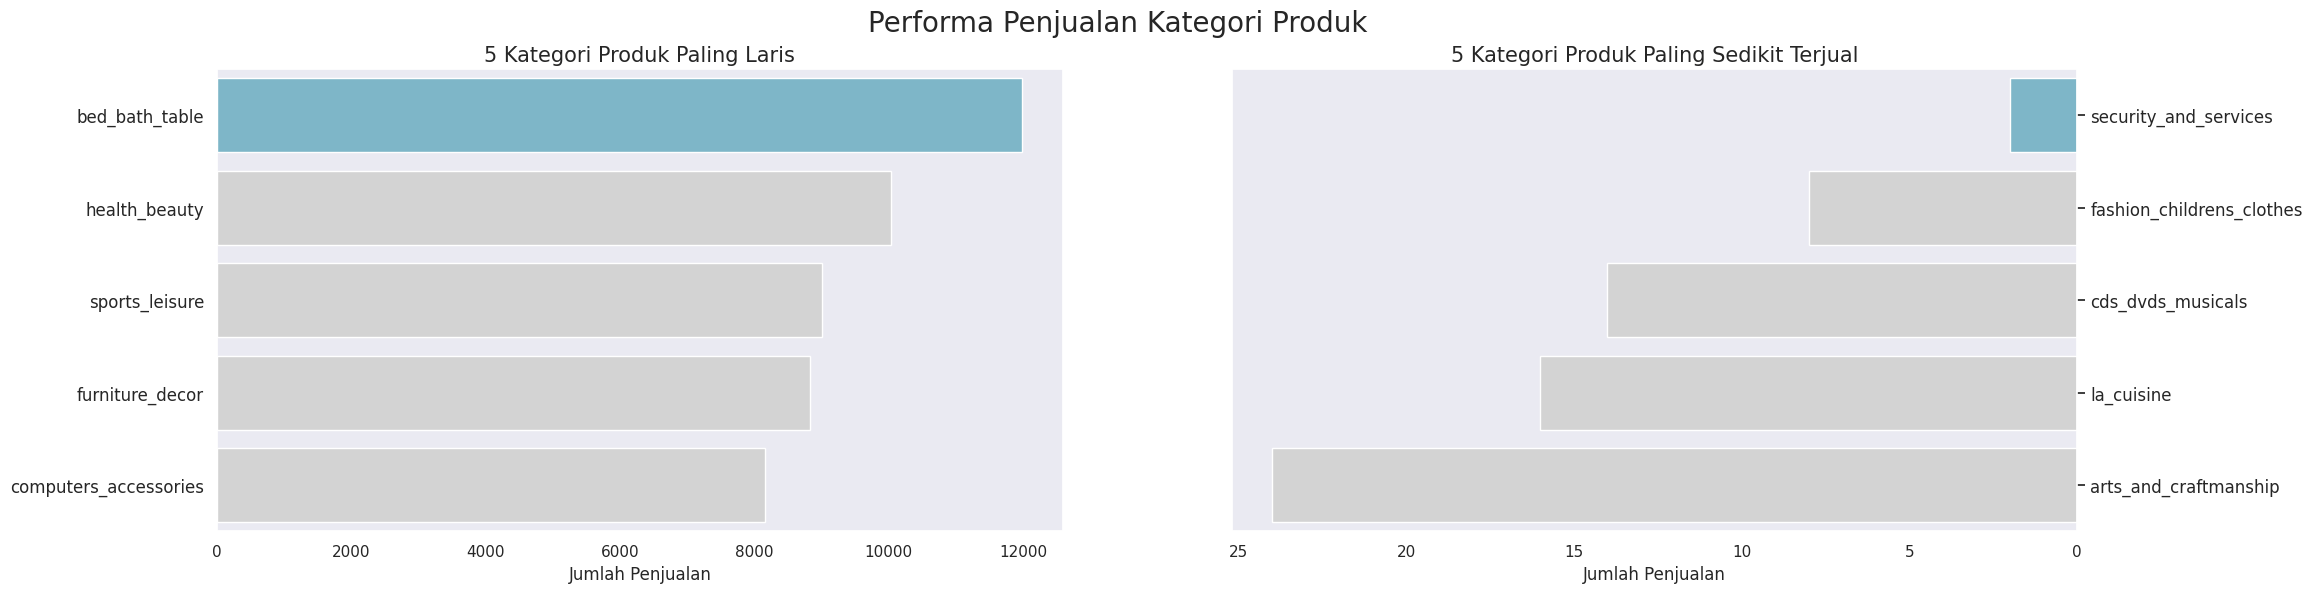

In [125]:
# Menghitung jumlah item terjual per kategori
sum_order_items_df = all_df.groupby("product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()

# Membuat Canvas/Figure dengan 2 subplot (kiri untuk terbanyak, kanan untuk terdikit)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Visualisasi Top 5 (Kiri)
sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0], hue="product_category_name_english", legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jumlah Penjualan", fontsize=12)
ax[0].set_title("5 Kategori Produk Paling Laris", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Visualisasi Bottom 5 (Kanan)
sns.barplot(x="order_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1], hue="product_category_name_english", legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jumlah Penjualan", fontsize=12)
ax[1].invert_xaxis() # Membalik sumbu X agar lebih rapi
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("5 Kategori Produk Paling Sedikit Terjual", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Performa Penjualan Kategori Produk", fontsize=20)
plt.show()

**Insight:**
* Berdasarkan visualisasi di atas, kategori produk yang paling laris adalah **`bed_bath_table`**, diikuti oleh *`health_beauty`* dan *`sports_leisure`*.
* Sebaliknya, kategori produk yang paling sedikit terjual adalah **`security_and_services`**, diikuti oleh *`fashion_childrens_clothes`* dan *`cd_dvd_musicals`*.
* Strategi pemasaran ke depan dapat difokuskan untuk mempertahankan ketersediaan stok pada kategori unggulan, serta mengevaluasi kembali strategi promosi atau relevansi produk pada kategori yang kurang diminati.

### Pertanyaan 2: Bagaimana performa penjualan platform E-Commerce seiring berjalannya waktu?

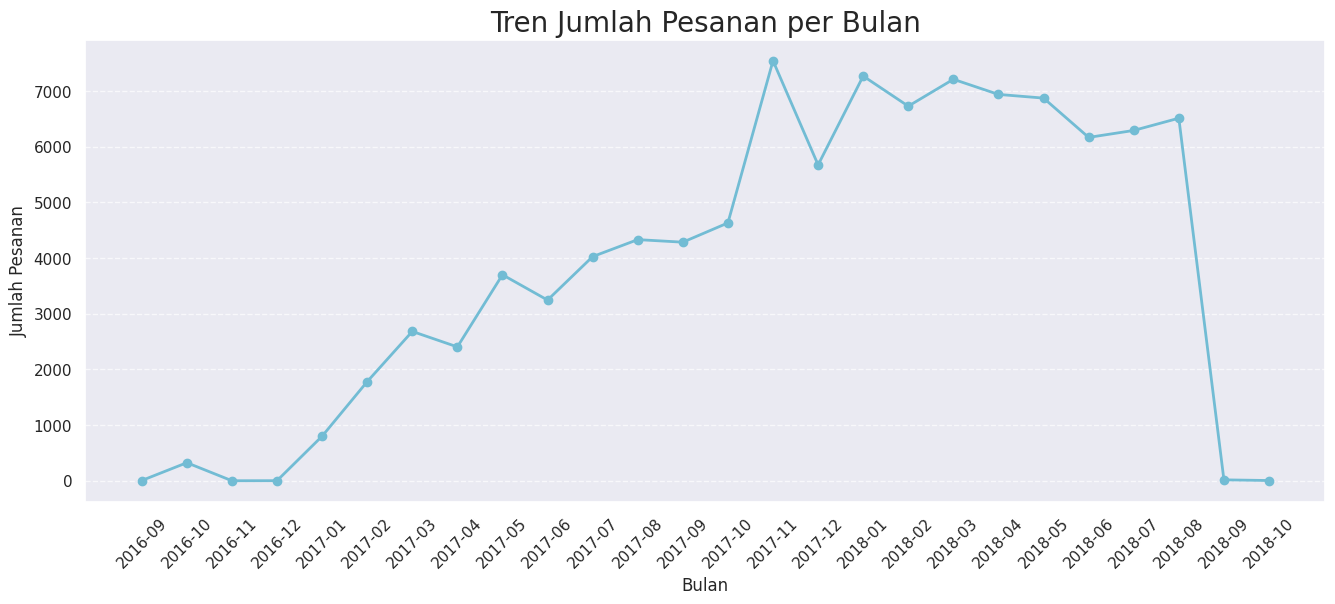

In [120]:
# Resampling data menjadi bulanan dan menghitung jumlah order unik
monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') # Mengubah format index menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)

# Visualisasi Line Chart
plt.figure(figsize=(16, 6))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Tren Jumlah Pesanan per Bulan", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45) # Memutar label sumbu X agar tidak bertumpuk
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
* Grafik tren bulanan menunjukkan bahwa performa penjualan mengalami peningkatan yang signifikan mulai dari akhir tahun 2017.
* Puncak tertinggi penjualan terjadi pada bulan November 2017 (kemungkinan besar dipengaruhi oleh *event* Black Friday) dan tren tinggi ini relatif bertahan hingga pertengahan tahun 2018.
* Terdapat penurunan drastis di bulan September dan Oktober 2018, yang mengindikasikan berakhirnya pencatatan dataset pada periode tersebut, bukan berarti tidak ada penjualan sama sekali.

### Pertanyaan 3: Bagaimana tingkat kepuasan pelanggan terhadap layanan yang diberikan?

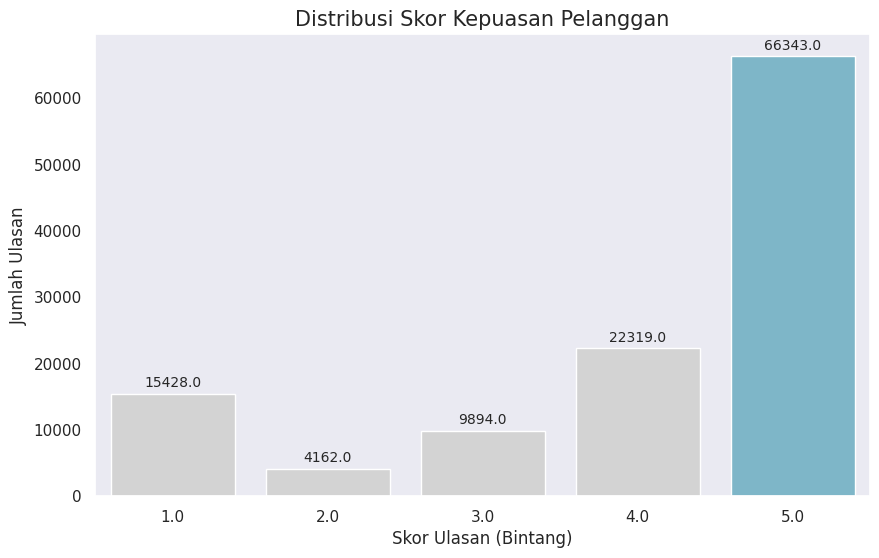

In [121]:
# Menghitung distribusi review score
review_scores_df = all_df['review_score'].value_counts().sort_index().reset_index()
review_scores_df.columns = ['review_score', 'count']

# Visualisasi Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='review_score',
    y='count',
    data=review_scores_df,
    palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"], # Highlight nilai 5
    hue='review_score', legend=False
)

plt.title("Distribusi Skor Kepuasan Pelanggan", loc="center", fontsize=15)
plt.xlabel("Skor Ulasan (Bintang)", fontsize=12)
plt.ylabel("Jumlah Ulasan", fontsize=12)

# Menambahkan label angka di atas setiap bar
for index, row in review_scores_df.iterrows():
    plt.text(row.name, row['count'] + 1000, str(row['count']), ha='center', fontsize=10)

plt.show()

**Insight:**
* Distribusi skor ulasan menunjukkan hasil yang sangat positif.
* Mayoritas pelanggan memberikan nilai maksimal, yaitu 5 bintang, yang mendominasi jauh di atas skor lainnya.
* Nilai 4 bintang juga merupakan kategori terbanyak kedua. Meskipun demikian, masih terdapat ulasan dengan nilai 1 bintang yang perlu diperhatikan.
* Secara keseluruhan, layanan E-Commerce dinilai sangat memuaskan oleh sebagian besar pelanggan.

## Analisis Lanjutan (Opsional)

### Pertanyaan 4: Di wilayah mana saja persebaran pelanggan kita yang paling banyak? (Geospatial Analysis)

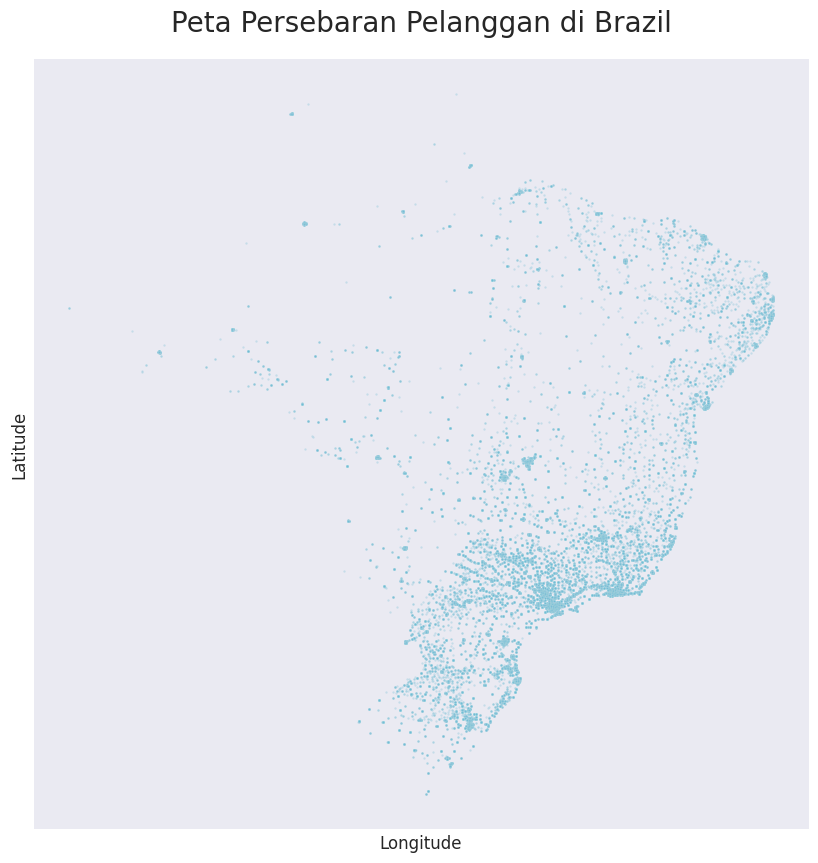

In [127]:
# 1. Menggabungkan data pelanggan dengan data geolokasi berdasarkan prefix kode pos
cust_geo_df = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how="inner",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

# 2. Membersihkan outlier koordinat agar peta Brazil terbentuk sempurna
# Mengambil batas koordinat (bounding box) negara Brazil
brazil_geo = cust_geo_df[
    (cust_geo_df['geolocation_lat'] <= 5.274388) &
    (cust_geo_df['geolocation_lat'] >= -33.751169) &
    (cust_geo_df['geolocation_lng'] <= -34.710462) &
    (cust_geo_df['geolocation_lng'] >= -73.9828305)
]

# 3. Visualisasi Peta Persebaran (Geospatial)
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='geolocation_lng',
    y='geolocation_lat',
    data=brazil_geo,
    s=3, # Ukuran titik
    color='#72BCD4', # Warna biru khas Dicoding
    alpha=0.3 # Transparansi agar kepadatan terlihat
)

plt.title("Peta Persebaran Pelanggan di Brazil", fontsize=20, pad=20)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Mematikan grid dan frame agar lebih terlihat seperti peta
plt.grid(False)
sns.despine(bottom=True, left=True)
plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

plt.show()

**Insight:**
* Berdasarkan visualisasi *Geospatial* di atas, sebaran titik (yang mewakili pelanggan) membentuk siluet negara Brazil.
* Konsentrasi titik yang paling pekat (berwarna biru terang) sangat terpusat di wilayah **Tenggara (Southeast) dan Selatan (South) Brazil**, khususnya di sekitar wilayah São Paulo dan Rio de Janeiro.
* Wilayah Utara (seperti Amazon) memiliki sebaran pelanggan yang sangat renggang.
* Informasi ini sangat berguna bagi perusahaan logistik untuk membangun pusat distribusi (gudang) baru di wilayah Tenggara agar biaya pengiriman menjadi lebih murah dan cepat.

### Pertanyaan 5: Kapan terakhir kali pelanggan bertransaksi, seberapa sering mereka bertransaksi, dan berapa banyak uang yang mereka habiskan?
Merupakan segmentasi pelanggan berdasarkan skor RFM (Recency, Frequency, Monetary)
- **Recency:** Berapa hari sejak transaksi terakhir (semakin kecil semakin baik).
- **Frequency:** Berapa kali pelanggan bertransaksi (semakin besar semakin baik).
- **Monetary:** Berapa total uang yang dihabiskan (semakin besar semakin baik).

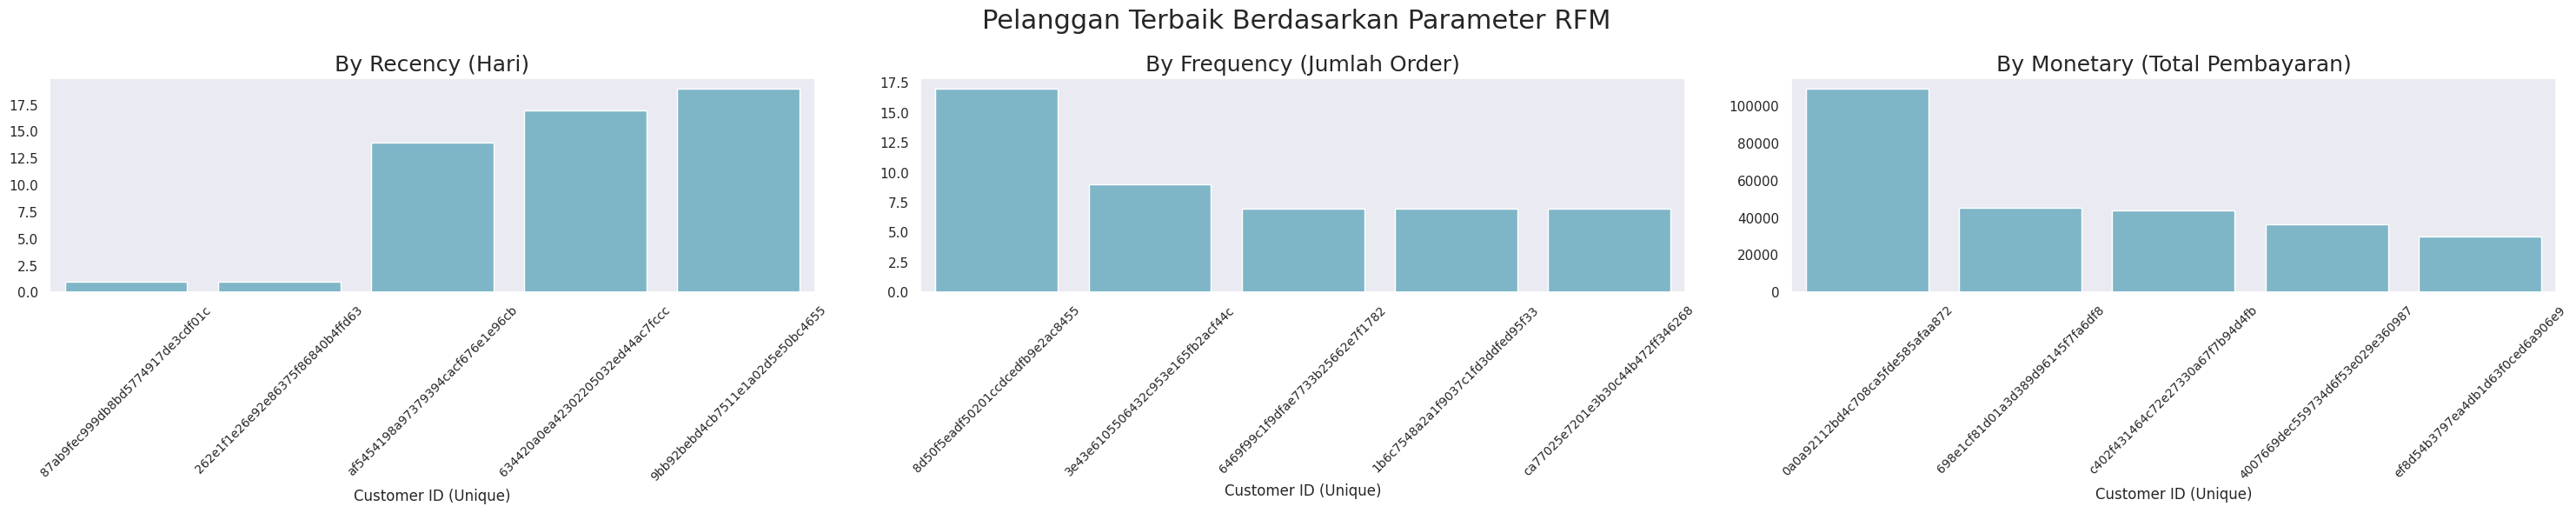

In [123]:
# 1. Menentukan tanggal acuan (tanggal transaksi terakhir di dataset + 1 hari)
recent_date = all_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 2. Membuat DataFrame RFM
rfm_df = all_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (recent_date - x.max()).days, # Recency
    'order_id': 'nunique',                                              # Frequency
    'payment_value': 'sum'                                              # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# 3. Visualisasi RFM (Top 5 Pelanggan untuk masing-masing metrik)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency (Paling sedikit harinya / paling baru bertransaksi)
sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0], hue="customer_unique_id", legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Customer ID (Unique)", fontsize=12)
ax[0].set_title("By Recency (Hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', rotation=45, labelsize=10) # Memutar label X karena ID yang panjang

# Frequency (Paling sering bertransaksi)
sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1], hue="customer_unique_id", legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Customer ID (Unique)", fontsize=12)
ax[1].set_title("By Frequency (Jumlah Order)", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=45, labelsize=10)

# Monetary (Paling banyak menghabiskan uang)
sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2], hue="customer_unique_id", legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel("Customer ID (Unique)", fontsize=12)
ax[2].set_title("By Monetary (Total Pembayaran)", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=45, labelsize=10)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=22)
plt.tight_layout() # Agar layout tidak bertumpuk
plt.show()

**Insight:**
Visualisasi di atas menunjukkan profil pelanggan terbaik kita berdasarkan tiga parameter utama RFM:
1. **Recency:** Menampilkan 5 pelanggan yang paling baru saja melakukan transaksi di platform kita (dalam hitungan hari).
2. **Frequency:** Menunjukkan bahwa sebagian besar pelanggan E-Commerce ini hanya bertransaksi 1 kali, namun ada beberapa pelanggan setia (Top 5) yang melakukan order hingga lebih dari 15 kali.
3. **Monetary:** Menampilkan pelanggan Sultan (*High-Value Customers*) yang telah menghabiskan total dana terbesar di platform kita (bisa mencapai lebih dari 100.000 mata uang lokal).
Pelanggan yang berada di puncak *Frequency* dan *Monetary* harus diberikan program loyalitas (seperti diskon eksklusif) agar tidak berpindah ke kompetitor.

In [124]:
# Menyimpan dataset yang sudah bersih untuk keperluan Dashboard Streamlit
all_df.to_csv("all_data.csv", index=False)

## Conclusion

Berdasarkan serangkaian proses analisis data yang telah dilakukan pada E-Commerce Public Dataset, berikut adalah kesimpulan untuk menjawab pertanyaan bisnis yang telah ditetapkan:

**1. Produk apa yang paling laris dan paling sedikit terjual?**
* **Kesimpulan:**
  * Kategori produk yang paling laris (menyumbang kuantitas pesanan terbanyak) adalah **`bed_bath_table`**, disusul oleh *`health_beauty`* dan *`sports_leisure`*.
  * Sebaliknya, produk yang paling sepi peminat adalah kategori **`security_and_services`** dan *`fashion_childrens_clothes`*.
* **Rekomendasi Bisnis:**
  * Perusahaan harus memastikan ketersediaan rantai pasok (*supply chain*) yang stabil untuk kategori unggulan agar tidak terjadi kekosongan stok.
  * Untuk kategori yang kurang laku, perusahaan bisa mempertimbangkan kampanye diskon cuci gudang atau mengevaluasi ulang kerjasama dengan *supplier* terkait.


**2. Bagaimana performa penjualan platform E-Commerce seiring berjalannya waktu?**
* **Kesimpulan:**
  * Performa penjualan menunjukkan tren pertumbuhan yang sangat positif sepanjang tahun 2017, dengan puncak penjualan (*peak season*) terjadi pada **November 2017**, yang kemungkinan besar didorong oleh momentum *Black Friday*.
  * Memasuki tahun 2018, angka penjualan cenderung stabil di titik yang tinggi.
* **Rekomendasi Bisnis:**
  * Perusahaan harus mempersiapkan kapasitas server dan infrastruktur logistik yang lebih masif menjelang bulan November setiap tahunnya untuk mengantisipasi lonjakan pesanan serupa.


**3. Bagaimana tingkat kepuasan pelanggan terhadap layanan yang diberikan?**
* **Kesimpulan:**
  * Tingkat kepuasan pelanggan sangat baik.
  * Mayoritas ulasan didominasi oleh rating 5 bintang, disusul oleh 4 bintang.
  * Ini mengindikasikan bahwa secara umum, pelanggan puas dengan produk dan layanan pengiriman platform.
* **Rekomendasi Bisnis:**
  * Meskipun didominasi nilai positif, perusahaan tetap perlu membuat tim layanan pelanggan (*customer service*) khusus untuk menindaklanjuti keluhan dari pengguna yang memberikan rating 1 atau 2 bintang agar reputasi platform tetap terjaga.


**4. Di wilayah mana saja persebaran pelanggan kita yang paling banyak? (Geospatial Analysis)**
* **Kesimpulan:**
  * Berdasarkan peta sebaran geolokasi, mayoritas pelanggan terkonsentrasi di wilayah Tenggara (Southeast) dan Selatan (South) negara Brazil.
  * Negara bagian São Paulo (SP) dan Rio de Janeiro (RJ) menjadi pusat penyumbang pelanggan terbanyak, sementara wilayah Utara (seperti Amazon) memiliki sebaran yang sangat renggang.
* **Rekomendasi Bisnis:**
  * Mengingat tingginya permintaan di wilayah Tenggara, disarankan untuk membangun atau memperbesar pusat distribusi (Gudang Utama) di negara bagian São Paulo guna menekan biaya logistik dan mempercepat waktu pengiriman (mengurangi *outlier* keterlambatan pesanan).


**5. Kapan terakhir kali pelanggan bertransaksi, seberapa sering mereka bertransaksi, dan berapa banyak uang yang mereka habiskan?**
* **Kesimpulan:**
  * Analisis *Recency, Frequency, dan Monetary* menunjukkan bahwa basis pelanggan E-Commerce ini didominasi oleh pembeli satu kali (*one-time buyers* / *Frequency* = 1).
  * Namun, terdapat segmen pelanggan bernilai tinggi (*High-Value Customers*) yang rutin berbelanja dan menghabiskan total uang (*Monetary*) dalam jumlah yang sangat besar melebihi pelanggan rata-rata.
* **Rekomendasi Bisnis:**
  * Perusahaan perlu merancang program **Customer Loyalty** (seperti sistem poin atau gratis ongkir eksklusif) yang ditargetkan khusus untuk pelanggan yang berada di top persentase *Frequency* dan *Monetary* guna mempertahankan mereka dari kompetitor.